<a href="https://colab.research.google.com/github/dienyffer2024/Estatistica/blob/Dados/Estatistica_Banco_de_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instalação

In [ ]:
!pip install mysql-connector-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.3/19.3 MB 33.6 MB/s eta 0:00:00


##Definir credenciais e informações da conexão

In [ ]:
import mysql.connector
from mysql.connector import Error
host = '34.46.115.184'
database = 'locadora'
user = 'bd-soulcode'
password = 'DFshsh@876'

##Criar conexão com a Base de Dados

In [ ]:
def conect_to_database():
  try:
    connection = mysql.connector.connect(
        host=host,
        database=database,
        user=user,
        password=password
    )
    if connection.is_connected():
      print("Conexão bem sucedida ao banco de dados SQL!")
      return connection
  except Error as e:
    print(f"Erro ao conectar ao banco de dados: {e}")
    return None

In [ ]:
connection = conect_to_database()

Conexão bem sucedida ao banco de dados SQL!


##Função para mostrar as tabelas disponíveis no Cloud

In [ ]:
def list_all_tables(connection):
    try:
        cursor = connection.cursor()
        # Executa o comando SHOW TABLES para listar todas as tabelas no banco de dados
        cursor.execute("SHOW TABLES;")
        tables = cursor.fetchall()

        if tables:
            print("Tabelas no banco de dados:")
            for table in tables:
                print(table[0])
        else:
            print("Nenhuma tabela encontrada.")

    except Error as e:
        print("Erro ao listar tabelas", e)

    finally:
        cursor.close()

if connection:
    # Listar todas as tabelas
    list_all_tables(connection)

Tabelas no banco de dados:
aluguel
carro
cliente
marca


##Instalando Pandas

In [ ]:
!pip install pandas

## Convertendo em Dataframe

In [ ]:
import pandas as pd
def fecth_data_as_dataframe(connection, query):
  try:
    cursor =connection.cursor()
    cursor.execute(query)
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    dfpd = pd.DataFrame(data, columns=columns)
    return dfpd
  except Error as e:
    print("Erro ao consultar dados", e)
    return None
  finally:
    cursor.close()

if connection:
  # Consultar dados da tabela aluguel
  query = "SELECT * FROM aluguel;"
  df_aluguel = fecth_data_as_dataframe(connection, query)

  if df_aluguel is not None:
    print("Dados da Tabela aluguel:")
    print(df_aluguel.head())
    print(df_aluguel.dtypes)

Dados da Tabela aluguel:
   codaluguel  codcliente  codcarro data_aluguel
0           1           3         2   2023-04-01
1           2           2         1   2023-04-02
2           3           2         1   2023-04-03
3           4           2         3   2023-04-04
4           5           1         4   2023-04-05
codaluguel       int64
codcliente       int64
codcarro         int64
data_aluguel    object
dtype: object


#Tratamento dos dados

##Transformando datas para o formato correto

In [ ]:
df_aluguel['data_aluguel'] = pd.to_datetime(df_aluguel['data_aluguel'])

# Verificando a conversão
print(df_aluguel.dtypes)
print(df_aluguel)

codaluguel               int64
codcliente               int64
codcarro                 int64
data_aluguel    datetime64[ns]
dtype: object
   codaluguel  codcliente  codcarro data_aluguel
0           1           3         2   2023-04-01
1           2           2         1   2023-04-02
2           3           2         1   2023-04-03
3           4           2         3   2023-04-04
4           5           1         4   2023-04-05
5           6           1         4   2023-04-13
6           7           1         1   2023-04-15
7           8           5         2   2023-04-19
8           9           5         2   2023-04-21
9          10           3         1   2023-04-25


##Converter a conexão com BD em DataFrame Pandas

In [ ]:
import pandas as pd
def fecth_data_as_dataframe(connection, query):
  try:
    cursor =connection.cursor()
    cursor.execute(query)
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    dfpd = pd.DataFrame(data, columns=columns)
    return dfpd
  except Error as e:
    print("Erro ao consultar dados", e)
    return None
  finally:
    cursor.close()

if connection:
  #Consultar dados da tabela carro
  query = "SELECT * FROM carro;"
  df_carro = fecth_data_as_dataframe(connection, query)

  if df_carro is not None:
    print("Dados da Tabela carro:")
    print(df_carro.head())
    print(df_carro.dtypes)

Dados da Tabela carro:
   codcarro  codmarca modelo  valor
0         1         1     Ka  100.0
1         2         2   Argo  150.0
2         3         3   Onix  170.0
3         4         4   Polo  150.0
4         5         5   Kwid  120.0
codcarro      int64
codmarca      int64
modelo       object
valor       float64
dtype: object


In [ ]:
import pandas as pd
def fecth_data_as_dataframe(connection, query):
  try:
    cursor =connection.cursor()
    cursor.execute(query)
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    dfpd = pd.DataFrame(data, columns=columns)
    return dfpd
  except Error as e:
    print("Erro ao consultar dados", e)
    return None
  finally:
    cursor.close()

if connection:
  #Consultar dados da tabela cliente
  query = "SELECT * FROM cliente;"
  df_cliente = fecth_data_as_dataframe(connection, query)

  if df_cliente is not None:
    print("Dados da Tabela cliente:")
    print(df_cliente.head())

Dados da Tabela cliente:
   codcliente              nome           cidade sexo estado estadocivil
0           1         Ana Silva  Duque de Caxias    F     RJ           C
1           2     Bruna Pereira          Niterói    F     RJ           C
2           3  Túlio Nascimento  Duque de Caxias    M     RJ           S
3           4    Fernando Souza         Campinas    M     SP           S
4           5     Lúcia Andrade        São Paulo    F     SP           C


In [ ]:
import pandas as pd
def fecth_data_as_dataframe(connection, query):
  try:
    cursor =connection.cursor()
    cursor.execute(query)
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    dfpd = pd.DataFrame(data, columns=columns)
    return dfpd
  except Error as e:
    print("Erro ao consultar dados", e)
    return None
  finally:
    cursor.close()

if connection:
  #Consultar dados da tabela marca
  query = "SELECT * FROM marca;"
  df_marca = fecth_data_as_dataframe(connection, query)

  if df_marca is not None:
    print("Dados da Tabela marca:")
    print(df_marca.head())

Dados da Tabela marca:
   codmarca       marca
0         1        Ford
1         2        Fiat
2         3   Chevrolet
3         4  Volkswagen
4         5     Renault


## Insights das tabelas do Dataframe locadora##

**Contando a frequência de aluguel por cliente**

In [ ]:
frequencia_aluguel = df_aluguel['codcliente'].value_counts().reset_index()
frequencia_aluguel.columns = ['codcliente', 'frequencia']

# Unindo com os dados dos clientes para obter os nomes
resultado = frequencia_aluguel.merge(df_cliente, on='codcliente', how='left')[['nome', 'frequencia']]

# Exibindo o resultado
print(resultado)

               nome  frequencia
0     Bruna Pereira           3
1         Ana Silva           3
2  Túlio Nascimento           2
3     Lúcia Andrade           2


**Contando a distribuição por Sexo e Estado Civil**

In [ ]:
distribuicao = df_cliente.groupby(['sexo', 'estadocivil']).size().reset_index(name='contagem')

# Exibindo o resultado
print(distribuicao)

  sexo estadocivil  contagem
0    F           C         3
1    M           S         2


**Contando a distribuição por Cidade e Estado**

In [ ]:
distribuicao_cidade = df_cliente['cidade'].value_counts().reset_index()
distribuicao_cidade.columns = ['cidade', 'contagem']

distribuicao_estado = df_cliente['estado'].value_counts().reset_index()
distribuicao_estado.columns = ['estado', 'contagem']

# Exibindo os resultados
print("Distribuição por Cidade:")
print(distribuicao_cidade)
print("\nDistribuição por Estado:")
print(distribuicao_estado)

Distribuição por Cidade:
            cidade  contagem
0  Duque de Caxias         2
1          Niterói         1
2         Campinas         1
3        São Paulo         1

Distribuição por Estado:
  estado  contagem
0     RJ         3
1     SP         2


**Contando a diversidade de modelos por marca e Juntando com os dados das marcas**

In [ ]:
diversidade = df_carro.groupby('codmarca').size().reset_index(name='quantidade_modelos')

resultado = diversidade.merge(df_marca, on='codmarca', how='left')[['marca', 'quantidade_modelos']]

print("Diversidade de Marcas e Modelos:")
print(resultado)

Diversidade de Marcas e Modelos:
        marca  quantidade_modelos
0        Ford                   1
1        Fiat                   1
2   Chevrolet                   1
3  Volkswagen                   1
4     Renault                   1


**Analisando perfis de clientes por preferências de carro e juntando os dataframes**

In [ ]:
merged = df_aluguel.merge(df_carro, on='codcarro').merge(df_marca, on='codmarca').merge(df_cliente, on='codcliente')

perfil_clientes = merged.groupby(['nome', 'sexo', 'estadocivil', 'modelo', 'marca']).size().reset_index(name='quantidade_alugueis')

print("Perfis de Clientes por Preferências de Carro:")
print(perfil_clientes)

Perfis de Clientes por Preferências de Carro:
               nome sexo estadocivil modelo       marca  quantidade_alugueis
0         Ana Silva    F           C     Ka        Ford                    1
1         Ana Silva    F           C   Polo  Volkswagen                    2
2     Bruna Pereira    F           C     Ka        Ford                    2
3     Bruna Pereira    F           C   Onix   Chevrolet                    1
4     Lúcia Andrade    F           C   Argo        Fiat                    2
5  Túlio Nascimento    M           S   Argo        Fiat                    1
6  Túlio Nascimento    M           S     Ka        Ford                    1


**Cálculo da média, mediana e moda**

In [ ]:
media_valor = df_carro['valor'].mean()
mediana_valor = df_carro['valor'].median()
moda_valor = df_carro['valor'].mode()[0]  # A moda pode retornar uma série, pegamos o primeiro valor

print(f"Média do valor dos carros: {media_valor}")
print(f"Mediana do valor dos carros: {mediana_valor}")
print(f"Moda do valor dos carros: {moda_valor}")

Média do valor dos carros: 138.0
Mediana do valor dos carros: 150.0
Moda do valor dos carros: 150.0


**Cálculo da variância e desvio padrão**

In [ ]:
variancia_valor = df_carro['valor'].var()
desvio_padrao_valor = df_carro['valor'].std()

print(f"Variância do valor dos carros: {variancia_valor}")
print(f"Desvio Padrão do valor dos carros: {desvio_padrao_valor}")

Variância do valor dos carros: 770.0
Desvio Padrão do valor dos carros: 27.748873851023216


# Usando Matplotlib para visualização

**Análise de distribuição por gênero, estado civil e análise de alugueis por cliente**

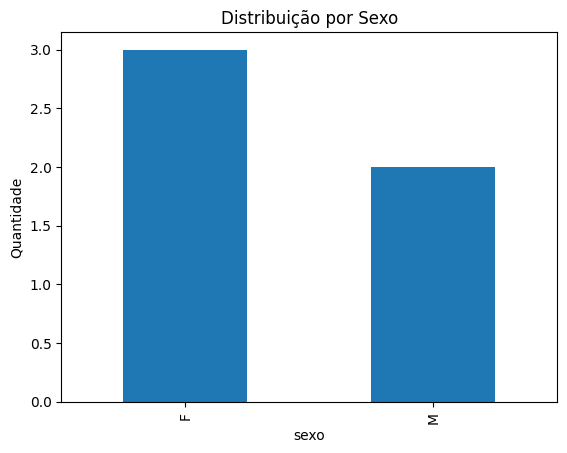

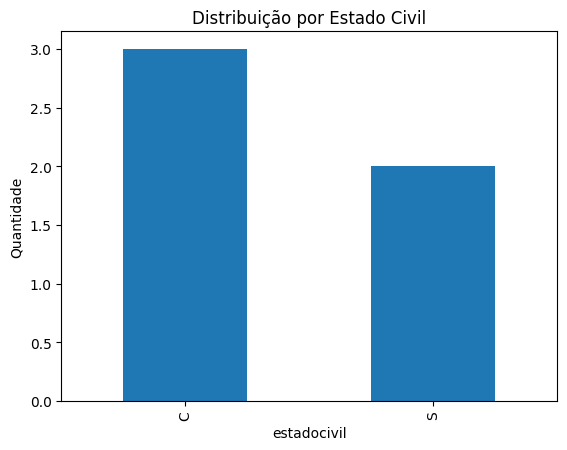

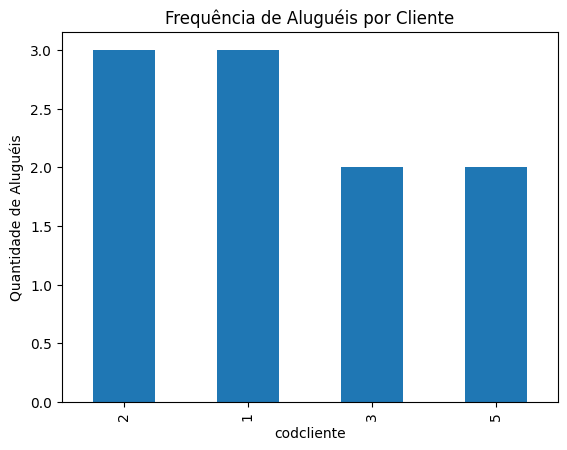

In [ ]:
import matplotlib.pyplot as plt

# Análise de distribuição por sexo
sexo_counts = df_cliente['sexo'].value_counts()
sexo_counts.plot(kind='bar', title='Distribuição por Sexo')
plt.ylabel('Quantidade')
plt.show()

# Análise de distribuição por estado civil
estadocivil_counts = df_cliente['estadocivil'].value_counts()
estadocivil_counts.plot(kind='bar', title='Distribuição por Estado Civil')
plt.ylabel('Quantidade')
plt.show()

# Análise de aluguéis por cliente
aluguels_counts = df_aluguel['codcliente'].value_counts()
aluguels_counts.plot(kind='bar', title='Frequência de Aluguéis por Cliente')
plt.ylabel('Quantidade de Aluguéis')
plt.show()

**Calculando a matriz de correlação**

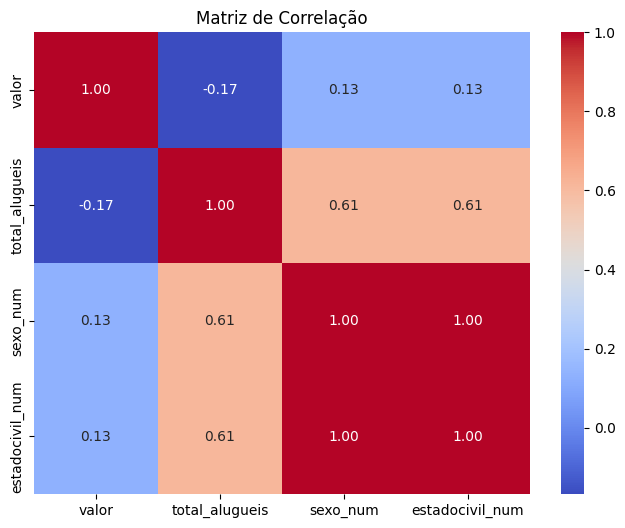

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Junção das tabelas para análise
merged = df_aluguel.merge(df_cliente, on='codcliente').merge(df_carro, on='codcarro')

# Total de aluguéis por cliente
total_alugueis = merged['codcliente'].value_counts().reset_index()
total_alugueis.columns = ['codcliente', 'total_alugueis']
merged = merged.merge(total_alugueis, on='codcliente')

# Convertendo colunas categóricas em numéricas
merged['sexo_num'] = merged['sexo'].map({'F': 1, 'M': 0})
merged['estadocivil_num'] = merged['estadocivil'].map({'C': 1, 'S': 0})

# Calculando a matriz de correlação
correlation_matrix = merged[['valor', 'total_alugueis', 'sexo_num', 'estadocivil_num']].corr()

# Visualizando a matriz de correlação
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação')
plt.show()

#Função para amostragem estratificada

In [ ]:
def amostragem_estratificada(df, strat_col, n):
    return df.groupby(strat_col, group_keys=False).apply(lambda x: x.sample(min(len(x), n)))

# Definindo o número de amostras por estrato
n_amostras = 2  # Pode ser ajustado conforme necessário

# Amostragem estratificada por gênero e estado
amostra_sexo = amostragem_estratificada(df_cliente, 'sexo', n_amostras)
amostra_estado = amostragem_estratificada(df_cliente, 'estado', n_amostras)

# Concatenando os resultados
amostra_total = pd.concat([amostra_sexo, amostra_estado]).drop_duplicates()

# Exibindo a amostra
print("Amostra Estratificada (Sexo e Estado):")
print(amostra_total)

Amostra Estratificada (Sexo e Estado):
   codcliente              nome           cidade sexo estado estadocivil
1           2     Bruna Pereira          Niterói    F     RJ           C
0           1         Ana Silva  Duque de Caxias    F     RJ           C
2           3  Túlio Nascimento  Duque de Caxias    M     RJ           S
3           4    Fernando Souza         Campinas    M     SP           S
4           5     Lúcia Andrade        São Paulo    F     SP           C


##Histograma do valor dos carros

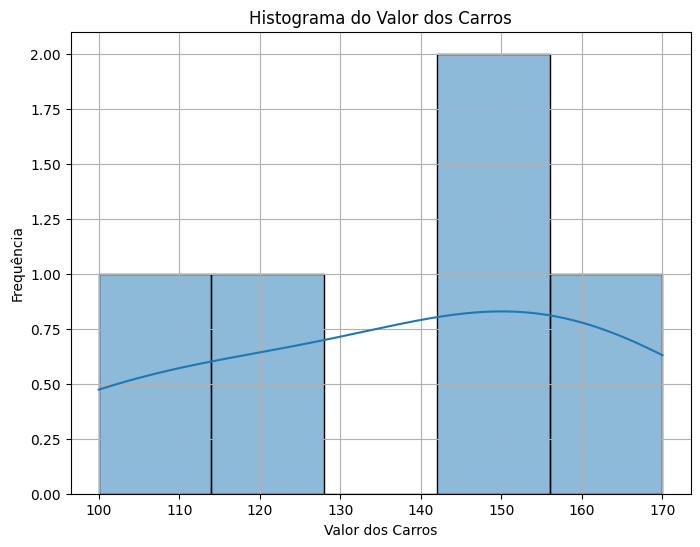

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df_carro['valor'], bins=5, kde=True)
plt.title('Histograma do Valor dos Carros')
plt.xlabel('Valor dos Carros')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

**Calculando a covariância**

In [ ]:
alugueis_count = df_aluguel['codcarro'].value_counts().reset_index()
alugueis_count.columns = ['codcarro', 'total_alugueis']

carros = df_carro.merge(alugueis_count, on='codcarro', how='left').fillna(0)

covariancia = carros[['valor', 'total_alugueis']].cov().iloc[0, 1]

print(f"A covariância entre o valor dos carros e o total de aluguéis é: {covariancia}")

# A covariância de -15.0 entre o valor dos carros e o total de aluguéis indica uma relação inversa entre essas duas variáveis. Isso significa que, conforme o valor dos carros aumenta, o número total de aluguéis tende a diminuir, e vice-versa.

A covariância entre o valor dos carros e o total de aluguéis é: -15.0


**Realizando o Teste Qui-Quadrado**

In [ ]:
import scipy.stats as stats

# Criando a tabela de contingência
contingencia = pd.crosstab(df_cliente['sexo'], df_cliente['estadocivil'])

# Exibindo a tabela de contingência
print("Tabela de Contingência:")
print(contingencia)

# Realizando o Teste Qui-Quadrado
chi2, p, dof, expected = stats.chi2_contingency(contingencia)

print(f'\nEstatística Qui-Quadrado: {chi2}')
print(f'Valor-p: {p}')
print(f'Degrees of Freedom: {dof}')
print(f'Frequências Esperadas:\n{expected}')

# Interpretação do resultado
alpha = 0.05
if p < alpha:
    print("\nRejeitamos a hipótese nula: existe uma relação significativa entre sexo e estado civil.")
else:
    print("\nNão rejeitamos a hipótese nula: não há relação significativa entre sexo e estado civil.")

Tabela de Contingência:
estadocivil  C  S
sexo             
F            3  0
M            0  2

Estatística Qui-Quadrado: 1.7013888888888888
Valor-p: 0.1921064408679386
Degrees of Freedom: 1
Frequências Esperadas:
[[1.8 1.2]
 [1.2 0.8]]

Não rejeitamos a hipótese nula: não há relação significativa entre sexo e estado civil.


**K-means para agrupamento**

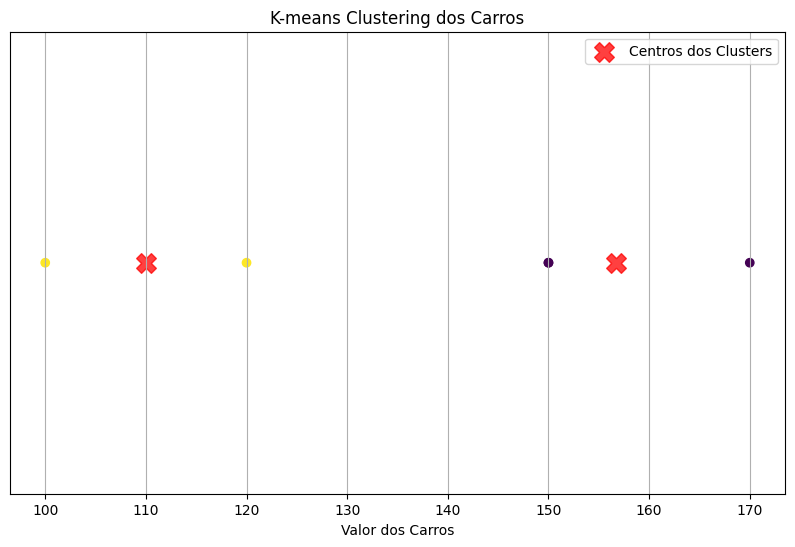

   codcarro  codmarca modelo  valor  total_alugueis_x  total_alugueis_y  \
0         1         1     Ka  100.0               4.0               4.0   
1         2         2   Argo  150.0               3.0               3.0   
2         3         3   Onix  170.0               1.0               1.0   
3         4         4   Polo  150.0               2.0               2.0   
4         5         5   Kwid  120.0               0.0               0.0   

   cluster  
0        1  
1        0  
2        0  
3        0  
4        1  


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

X = carros[['valor']]

# Padronizando os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicando K-means
k = 2  # Número de clusters
kmeans = KMeans(n_clusters=k, random_state=42)
carros['cluster'] = kmeans.fit_predict(X_scaled)

# Visualizando os resultados
plt.figure(figsize=(10, 6))
plt.scatter(carros['valor'], np.zeros_like(carros['valor']), c=carros['cluster'], cmap='viridis', marker='o')
plt.title('K-means Clustering dos Carros')
plt.xlabel('Valor dos Carros')
plt.yticks([])  # Remove o eixo y para melhor visualização
plt.grid(True)

# Mostrando os centros dos clusters
centros = scaler.inverse_transform(kmeans.cluster_centers_)
plt.scatter(centros[:, 0], np.zeros_like(centros[:, 0]), c='red', s=200, alpha=0.75, marker='X', label='Centros dos Clusters')
plt.legend()
plt.show()

# Exibindo os dados dos carros com os clusters
print(carros)

##Distribuição Binominal

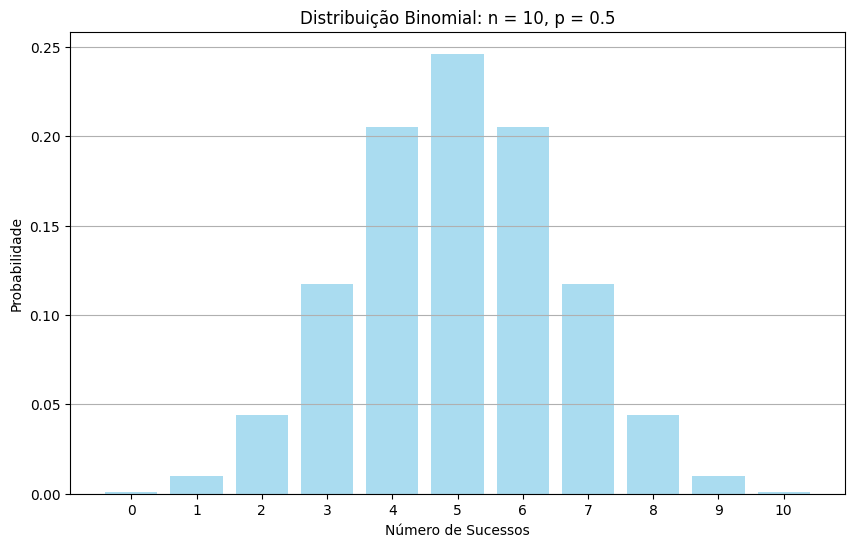

Média: 5.0
Variância: 2.5


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

n = 10  # número de tentativas
p = 0.5  # probabilidade de sucesso

# Criando um array de possíveis sucessos (0 a n)
x = np.arange(0, n + 1)

# Calculando a probabilidade de cada número de sucessos
probabilidades = binom.pmf(x, n, p)

# Visualizando a distribuição
plt.figure(figsize=(10, 6))
plt.bar(x, probabilidades, color='skyblue', alpha=0.7)
plt.title('Distribuição Binomial: n = 10, p = 0.5')
plt.xlabel('Número de Sucessos')
plt.ylabel('Probabilidade')
plt.xticks(x)
plt.grid(axis='y')
plt.show()

# Cálculo da média e variância
media = n * p
variancia = n * p * (1 - p)

print(f'Média: {media}')
print(f'Variância: {variancia}')

**Fechando a conexão após finalizar análises**

In [ ]:
if connection:
  connection.close()